In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/.sav/scikitlearn/default/1/final_model.sav
/kaggle/input/bank-full-version1/bank-full.csv
/kaggle/input/bank-01/bank.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
Bank_data = pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [4]:
import pandas as pd


Bank_data = pd.read_csv('/kaggle/input/bank-full-version1/bank-full.csv')

# Display column names
print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
Bank_data.head()

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sl. no     45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [9]:
Bank_data = Bank_data.drop_duplicates()
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
# Check for missing values 
print(Bank_data.isnull().sum())

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [54]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [56]:
pd.DataFrame(Bank_data['education'].value_counts())

,count
education,
secondary,23202
tertiary,13301
primary,6851


In [57]:
newdataframe.isna().sum()

sl. no          0
age             0
job           288
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

In [ ]:
newdataframe = newdataframe.sort_values(by='age', ascending=True)

In [58]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [59]:
newdataframe['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [62]:
data_marital

,student,blue-collar,admin.,services,unemployed,technician,retired,management,entrepreneur,self-employed,housemaid,nan
marital,,,,,,,,,,,,
single,878,2014,1728,1198,401,2620,108,2947,238,446,144,NaN
married,54,6968,2693,2407,731,4052,1731,5400,1070,993,912,NaN
divorced,6,750,750,549,171,925,425,1111,179,140,184,NaN


In [64]:
import pandas as pd


agetomarital = pd.DataFrame()
agetomarital['married'] = newdataframe[newdataframe['marital'] == 'married']['age'].value_counts()
agetomarital['single'] = newdataframe[newdataframe['marital'] == 'single']['age'].value_counts()
agetomarital['divorced'] = newdataframe[newdataframe['marital'] == 'divorced']['age'].value_counts()

print(agetomarital)


     married  single  divorced
age                           
34      1131   650.0     149.0
35      1077   631.0     186.0
36      1076   538.0     192.0
33      1075   746.0     151.0
37      1073   453.0     170.0
..       ...     ...       ...
89         2     NaN       1.0
92         2     NaN       NaN
93         2     NaN       NaN
88         2     NaN       NaN
95         1     NaN       1.0

[73 rows x 3 columns]


In [65]:
agetomarital.sort_index()

,married,single,divorced
age,,,
20,3,47.0,NaN
21,5,74.0,NaN
22,9,120.0,NaN
23,27,175.0,NaN
24,53,248.0,1.0
...,...,...,...
88,2,NaN,NaN
89,2,NaN,1.0
92,2,NaN,NaN


In [66]:
newdataframe['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [67]:
import pandas as pd


agetoeducation = pd.DataFrame()
agetoeducation['tertiary'] = newdataframe[newdataframe['education'] == 'tertiary']['age'].value_counts()
agetoeducation['secondary'] = newdataframe[newdataframe['education'] == 'secondary']['age'].value_counts()
agetoeducation['unknown'] = newdataframe[newdataframe['education'] == 'unknown']['age'].value_counts()
agetoeducation['primary'] = newdataframe[newdataframe['education'] == 'primary']['age'].value_counts()

print(agetoeducation)

     tertiary  secondary  unknown  primary
age                                       
32        776     1088.0      NaN      179
33        760     1011.0      NaN      167
31        749     1065.0      NaN      139
34        718     1000.0      NaN      166
30        686      913.0      NaN      124
..        ...        ...      ...      ...
82          2        3.0      NaN       12
81          2        3.0      NaN       10
80          1       12.0      NaN       17
89          1        NaN      NaN        2
84          1        3.0      NaN        5

[65 rows x 4 columns]


In [68]:
agetoeducation.sort_index()

,tertiary,secondary,unknown,primary
age,,,,
20,3,26.0,NaN,6
21,6,54.0,NaN,10
22,14,96.0,NaN,8
23,33,143.0,NaN,17
24,44,219.0,NaN,19
...,...,...,...,...
81,2,3.0,NaN,10
82,2,3.0,NaN,12
83,5,2.0,NaN,14


In [69]:
print(data_marital.columns)


Index(['student', 'blue-collar', 'admin.', 'services', 'unemployed',
       'technician', 'retired', 'management', 'entrepreneur', 'self-employed',
       'housemaid', 'nan'],
      dtype='object')


In [71]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [74]:
print(newdataframe.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [75]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [77]:
# Check unique values in the 'deposited?' column
print(newdataframe['y'].unique())

# Check for any missing values in the 'job' and 'deposited?' columns
print(newdataframe[['job', 'y']].isna().sum())


['no' 'yes']
job    288
y        0
dtype: int64


In [82]:
old_age = newdataframe[newdataframe['age'] > 61]

In [83]:
old_age

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28906,28907,66,housemaid,married,secondary,no,1929,no,no,cellular,2,feb,169,1,-1,0,unknown,no
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29158,29159,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,29262,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [84]:
old_age[old_age['y'] == 'yes']

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29464,29465,68,retired,divorced,primary,no,250,no,no,cellular,3,feb,360,1,-1,0,unknown,yes
29865,29866,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
29961,29962,69,retired,married,primary,no,324,no,no,cellular,4,feb,136,4,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [85]:
old_age

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28906,28907,66,housemaid,married,secondary,no,1929,no,no,cellular,2,feb,169,1,-1,0,unknown,no
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29158,29159,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,29262,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [87]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [101]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,4,47,blue-collar,married,NaN,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,5,33,NaN,single,NaN,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [119]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,-1,0,unknown,0
5,6,35,management,married,tertiary,0,231,1,0,unknown,5,may,1,-1,0,unknown,0
6,7,28,management,single,tertiary,0,447,1,1,unknown,5,may,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,4,-1,0,unknown,0


In [120]:
newdataframe.rename(columns = {'y':'deposited?'}, inplace = True)

In [121]:
print(newdataframe.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposited?'],
      dtype='object')


In [124]:
x=newdataframe.drop(['deposited?'],axis=1)
y=newdataframe['deposited?']

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split

x = pd.get_dummies(x)
x.columns = [col.lower() for col in x.columns]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3, stratify=y)


In [126]:
x = pd.get_dummies(x)
x.columns=[x.lower() for x in x.columns]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3, stratify=y)

In [127]:
df_train = x_train.copy()
df_train['deposited?'] = y_train
df_train.head()

,sl. no,age,default,balance,housing,loan,day,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposited?
8279,8280,35,0,532,1,0,2,1,-1,0,...,False,False,False,False,False,False,False,False,True,0
35520,35521,57,0,1577,1,0,7,2,357,1,...,False,True,False,False,False,False,True,False,False,0
41793,41794,32,0,2688,0,0,14,1,57,1,...,False,False,False,True,False,True,False,False,False,1
11500,11501,46,0,2441,0,0,19,2,-1,0,...,False,False,False,False,False,False,False,False,True,0
22837,22838,34,0,280,0,0,25,11,-1,0,...,False,False,False,False,False,False,False,False,True,0


In [41]:
classes=df_train['deposited?'].value_counts()
normal_share=round(classes[0]/df_train['deposited?'].count()*100,2)
fraud_share=round(classes[1]/df_train['deposited?'].count()*100, 2)
print("Non-deposited? : {} %".format(normal_share))
print("deposited? : {} %".format(fraud_share))

Non-deposited? : 88.3 %
deposited? : 11.7 %


/tmp/ipykernel_30/2674631261.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_share=round(classes[0]/df_train['deposited?'].count()*100,2)
/tmp/ipykernel_30/2674631261.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fraud_share=round(classes[1]/df_train['deposited?'].count()*100, 2)


In [47]:
x_train=df_train.drop(['deposited?'],axis=1)
y_train=df_train['deposited?']

In [86]:
def evaluation_metrics(y_test, y_pre, target_names):
    #scores
    print("Accuracy :",accuracy_score(y_test,y_pre))
    print("Precision :",precision_score(y_test,y_pre))
    print("Recall :",recall_score(y_test,y_pre))
    print("F1 Score :",f1_score(y_test,y_pre))

    print(classification_report(y_test, y_pre, target_names=target_names))

    #AUC
    fpr, tpr, _ = roc_curve(y_test,  y_pre)
    auc = roc_auc_score(y_test, y_pre)
    print("AUC :", auc)

    #ROC
    plt.plot(fpr,tpr,label="uc={:.3f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()

    #CM matrix
    matrix = confusion_matrix(y_test, y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)

    sns.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

In [50]:
target_names=['No Deposited', 'Deposited']

# Logistic Regression

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluation_metrics(y_test, y_pre, target_names):
    # scores
    print("Accuracy :", accuracy_score(y_test, y_pre))
    print("Precision :", precision_score(y_test, y_pre, pos_label='yes'))
    print("Recall :", recall_score(y_test, y_pre, pos_label='yes'))
    print("F1 Score :", f1_score(y_test, y_pre, pos_label='yes'))





In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def log(x_train,x_test,y_train,y_test):
    model=LogisticRegression()
    model.fit(x_train,y_train)
    y_pre=model.predict(x_test)
    evaluation_metrics(y_test, y_pre, target_names)

log(x_train,x_test,y_train,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy : 0.8883810085520495
Precision : 0.5516265912305516
Recall : 0.24574669187145556
F1 Score : 0.3400174367916303


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

No Deposited       0.91      0.97      0.94     11977
   Deposited       0.55      0.25      0.34      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564

Accuracy: 0.8883810085520495
AUC: 0.8054506276706893


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



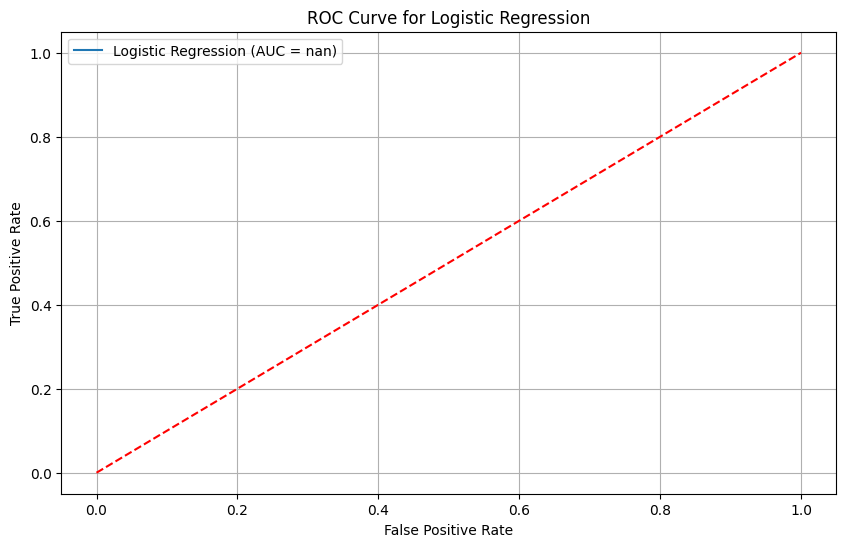

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def evaluation_metrics(y_test, y_pre, y_proba, target_names):
    # scores
    report = classification_report(y_test, y_pre, target_names=target_names)
    print(report)
    accuracy = accuracy_score(y_test, y_pre)
    print(f"Accuracy: {accuracy}")

    # AUC
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"AUC: {auc_score}")

def log(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pre = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]  # Get probability scores for the positive class
    evaluation_metrics(y_test, y_pre, y_proba, target_names=['No Deposited', 'Deposited'])
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='Deposited')
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
log(x_train, x_test, y_train, y_test)


In [63]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import numpy as np

def evaluation_metrics(y_test, y_pre, y_proba, target_names):
    # scores
    report = classification_report(y_test, y_pre, target_names=target_names)
    print(report)
    accuracy = accuracy_score(y_test, y_pre)
    print(f"Accuracy: {accuracy}")

    # AUC
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"AUC: {auc_score}")

def log(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pre = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]  # Get probability scores for the positive class
    evaluation_metrics(y_test, y_pre, y_proba, target_names=['No Deposited', 'Deposited'])

# Classification Report
report = classification_report(y_test, y_pre, target_names=['No Deposited', 'Deposited'])
print(report)

# Accuracy
accuracy = accuracy_score(y_test, y_pre)
print(f"Accuracy: {accuracy}")

# AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score}")

# Display the results
results = classification_report(y_test, y_pre, target_names=['No Deposited', 'Deposited'], output_dict=True)
print(f"Precision (No Deposited): {results['No Deposited']['precision']}")
print(f"Recall (No Deposited): {results['No Deposited']['recall']}")
print(f"F1 Score (No Deposited): {results['No Deposited']['f1-score']}")
print(f"Support (No Deposited): {results['No Deposited']['support']}")
print(f"Precision (Deposited): {results['Deposited']['precision']}")
print(f"Recall (Deposited): {results['Deposited']['recall']}")
print(f"F1 Score (Deposited): {results['Deposited']['f1-score']}")
print(f"Support (Deposited): {results['Deposited']['support']}")
print(f"Accuracy: {accuracy}")
print(f"Macro Avg: {results['macro avg']}")
print(f"Weighted Avg: {results['weighted avg']}")
print(f"AUC: {auc_score}")


NameError: name 'y_pre' is not defined

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



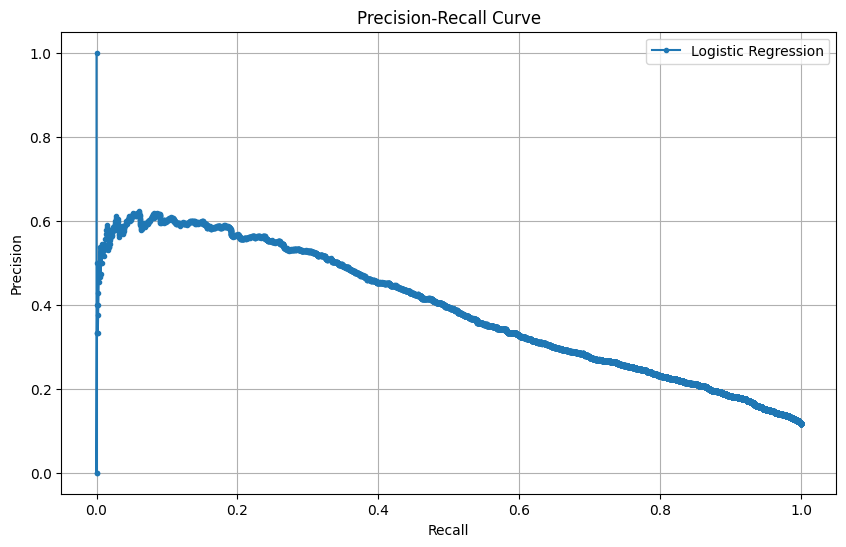

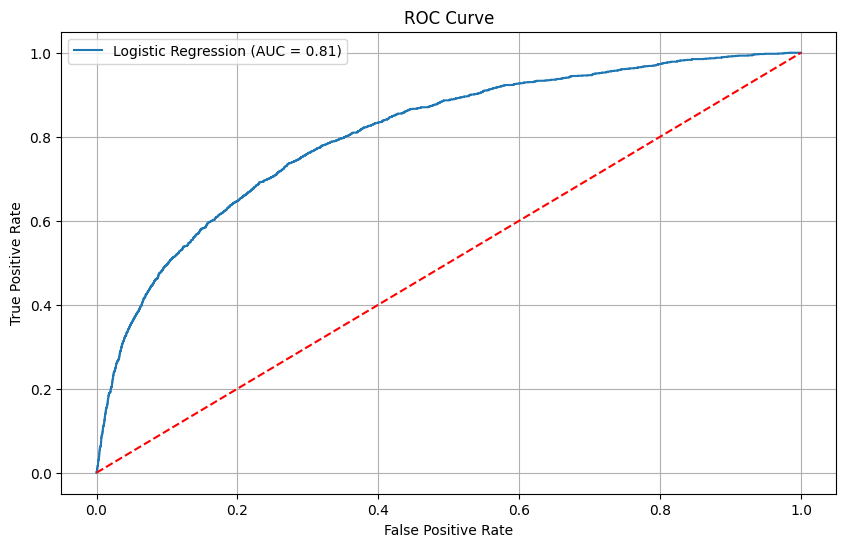

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

def log(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_proba = model.predict_proba(x_test)[:, 1]  # Get probability scores for the positive class
    return y_proba

# Get probability scores
y_proba = log(x_train, x_test, y_train, y_test)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba, pos_label='yes')
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='yes')
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
x_train=df_train.drop(['deposited?'],axis=1)
y_train=df_train['deposited?']

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



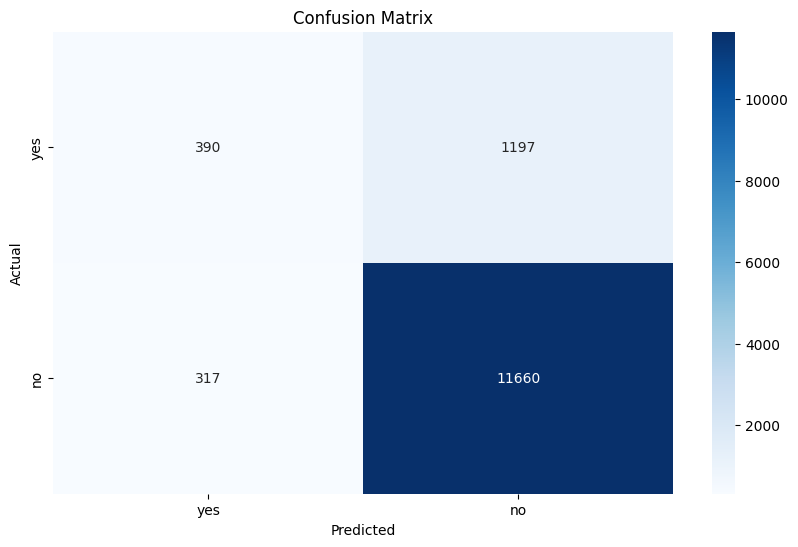

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def log(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pre = model.predict(x_test)
    return y_pre

# Get predictions
y_pre = log(x_train, x_test, y_train, y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pre, labels=['yes', 'no'])

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# RidgeClassifier

In [66]:
def evaluation_metrics(y_test, y_pre, target_names):
    #scores
    print("Accuracy :",accuracy_score(y_test,y_pre))
    print("Precision :",precision_score(y_test,y_pre))
    print("Recall :",recall_score(y_test,y_pre))
    print("F1 Score :",f1_score(y_test,y_pre))

    print(classification_report(y_test, y_pre, target_names=target_names))

    #AUC
    fpr, tpr, _ = roc_curve(y_test,  y_pre)
    auc = roc_auc_score(y_test, y_pre)
    print("AUC :", auc)

    #ROC
    plt.plot(fpr,tpr,label="uc={:.3f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()

    #CM matrix
    matrix = confusion_matrix(y_test, y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)

    sns.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

In [67]:
def Ridge(x_train,x_test,y_train,y_test):
    #train the model
    model = RidgeClassifier(random_state=2)
    model.fit(x_train, y_train)
    #predictions
    y_pre = model.predict(x_test)
    evaluation_metrics(y_test, y_pre, target_names)

In [ ]:
print(y_test.unique())


              precision    recall  f1-score   support

          no       0.91      0.98      0.95     11977
         yes       0.68      0.30      0.42      1587

    accuracy                           0.90     13564
   macro avg       0.80      0.64      0.68     13564
weighted avg       0.89      0.90      0.88     13564

Accuracy: 0.9012828074314362
Precision: 0.6766381766381766
Recall: 0.29930686830497794
F1 Score: 0.4150283966797728
AUC: 0.9243818979025068


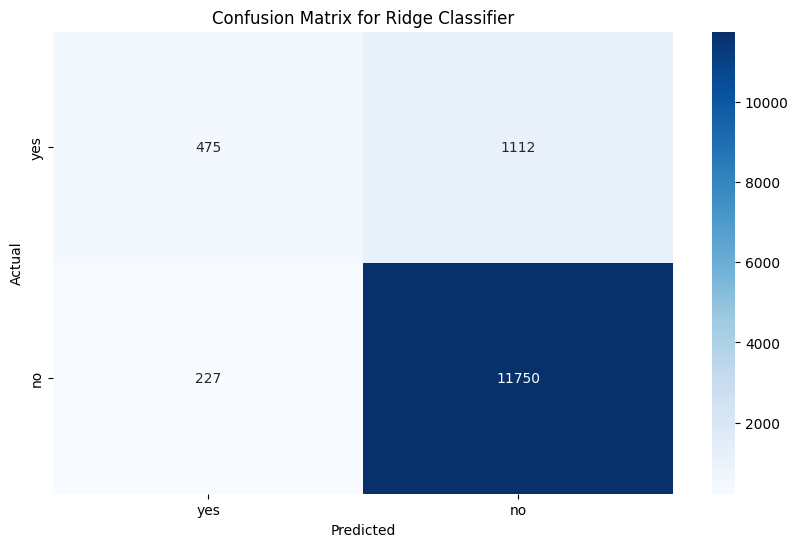

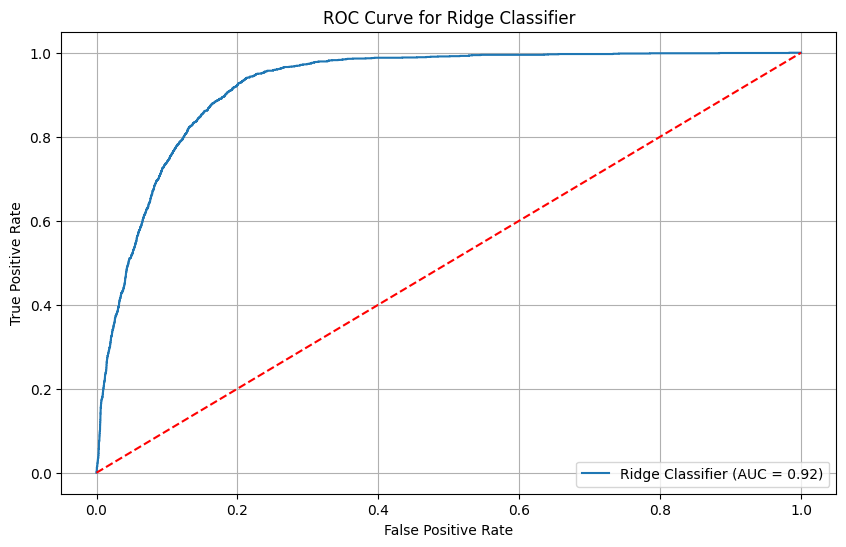

In [68]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluation_metrics(y_test, y_pre, target_names):
    # Scores
    report = classification_report(y_test, y_pre, target_names=target_names)
    print(report)
    accuracy = accuracy_score(y_test, y_pre)
    print(f"Accuracy: {accuracy}")
    
    # Precision, Recall, F1 Score
    print(f"Precision: {precision_score(y_test, y_pre, pos_label='yes')}")
    print(f"Recall: {recall_score(y_test, y_pre, pos_label='yes')}")
    print(f"F1 Score: {f1_score(y_test, y_pre, pos_label='yes')}")

def Ridge(x_train, x_test, y_train, y_test):
    # Train the model
    model = RidgeClassifier(random_state=2)
    model.fit(x_train, y_train)
    # Predictions
    y_pre = model.predict(x_test)
    
    # Print evaluation metrics
    evaluation_metrics(y_test, y_pre, target_names=['no', 'yes'])
    
    # Compute AUC
    y_scores = model.decision_function(x_test)
    auc_score = roc_auc_score(y_test, y_scores)
    print(f"AUC: {auc_score}")
    
    # Plot confusion matrix
    unique_labels = y_test.unique()
    cm = confusion_matrix(y_test, y_pre, labels=unique_labels)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.title('Confusion Matrix for Ridge Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label='yes')
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Ridge Classifier (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Ridge Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
Ridge(x_train, x_test, y_train, y_test)


# Random forest Classifier

In [109]:
def RF(x_train,x_test,y_train,y_test):
  #train the model
  model = RandomForestClassifier(random_state=2)
  model.fit(x_train, y_train)
  #predictions
  y_pre = model.predict(x_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluation_metrics(y_test, y_pre, y_proba, target_names):
    # Scores
    print("Accuracy:", accuracy_score(y_test, y_pre))
    print("Precision:", precision_score(y_test, y_pre, pos_label='Deposited'))
    print("Recall:", recall_score(y_test, y_pre, pos_label='Deposited'))
    print("F1 Score:", f1_score(y_test, y_pre, pos_label='Deposited'))
    print(classification_report(y_test, y_pre, target_names=target_names))
    
    # AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='Deposited')
    auc = roc_auc_score(y_test, y_proba)
    print("AUC:", auc)
    
    # ROC
    plt.plot(fpr, tpr, label="AUC={:.3f}".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc=4)
    plt.show()
    
    # Confusion Matrix
    matrix = confusion_matrix(y_test, y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)
    sns.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt='g')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()


In [125]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def evaluation_metrics(y_test, y_pre, y_proba, target_names):
    # Print Scores
    print("Accuracy:", accuracy_score(y_test, y_pre))
    print("Precision:", precision_score(y_test, y_pre, pos_label='Deposited'))
    print("Recall:", recall_score(y_test, y_pre, pos_label='Deposited'))
    print("F1 Score:", f1_score(y_test, y_pre, pos_label='Deposited'))
    print(classification_report(y_test, y_pre, target_names=target_names))
    
    # AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='Deposited')
    auc_score = roc_auc_score(y_test, y_proba)
    print("AUC:", auc_score)
    
    # ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pre, labels=['Deposited', 'No Deposited'])
    cm_df = pd.DataFrame(cm, index=['Deposited', 'No Deposited'], columns=['Deposited', 'No Deposited'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Ensure your model fits and predictions are done before calling evaluation_metrics
# Example usage:
# RF(x_train, x_test, y_train, y_test) should call evaluation_metrics with y_test, y_pre, y_proba


In [88]:
def RF(x_train,x_test,y_train,y_test):
  #train the model
  model = RandomForestClassifier(random_state=2)
  model.fit(x_train, y_train)
  #predictions
  y_pre = model.predict(x_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [89]:
x_train=df_train.drop(['deposited?'],axis=1)
y_train=df_train['deposited?']

              precision    recall  f1-score   support

No Deposited       0.93      0.97      0.95     11977
   Deposited       0.68      0.47      0.55      1587

    accuracy                           0.91     13564
   macro avg       0.81      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564

Accuracy: 0.9118254202300207
AUC: 0.9380842266518072


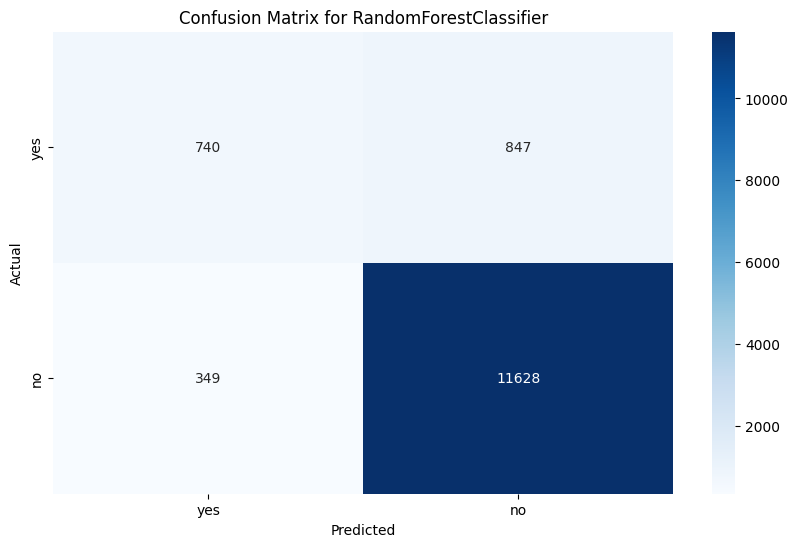

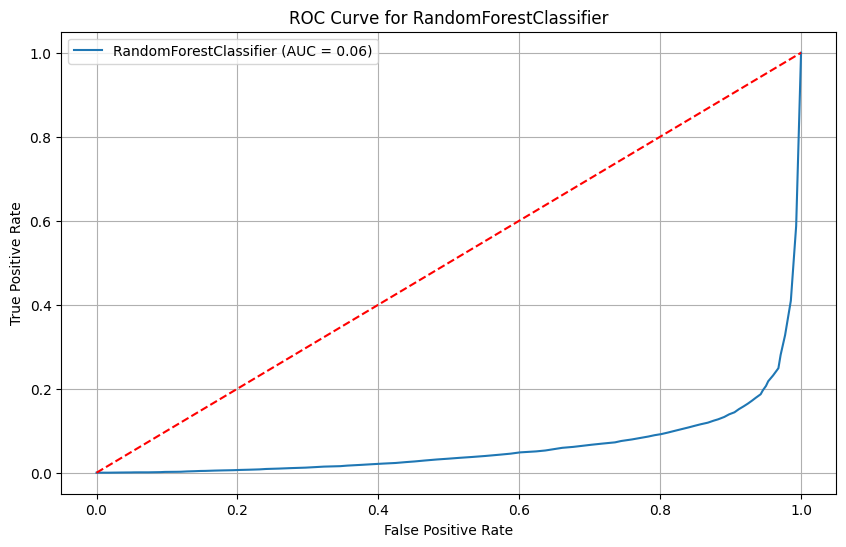

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluation_metrics(y_test, y_pre, y_proba, target_names):
    # Scores
    report = classification_report(y_test, y_pre, target_names=target_names)
    print(report)
    accuracy = accuracy_score(y_test, y_pre)
    print(f"Accuracy: {accuracy}")
    
    # AUC
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"AUC: {auc_score}")

def RF(X_train, X_test, y_train, y_test):
    # Train the model
    model = RandomForestClassifier(random_state=2)
    model.fit(X_train, y_train)
    # Predictions
    y_pre = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
    # Print evaluation metrics
    evaluation_metrics(y_test, y_pre, y_proba, target_names=['No Deposited', 'Deposited'])
    
    # Plot confusion matrix
    unique_labels = y_test.unique()
    cm = confusion_matrix(y_test, y_pre, labels=unique_labels)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.title('Confusion Matrix for RandomForestClassifier')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=unique_labels[1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'RandomForestClassifier (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for RandomForestClassifier')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
RF(x_train, x_test, y_train, y_test)


# Conclusion

* Approximately all the classifiers have same result, but Random Forest was the best one.
* The model has around 91% Accuracy.
* Random Forest has 93% Precision, 95% Recall, & 95% F1 Score.
* We can also see the results for each classifier as well.